**Toronto Dwellings Analysis**
--

In [4]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

**Load Data**

In [33]:
# Read the census data into a Pandas DataFrame
file_path = Path("C:/Users/DELL/Desktop/w6_Pythonic_Monopoly/resources/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


**Dwelling Types Per Year**

---


In [76]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_py = pd.DataFrame(to_data.iloc[:,0:8])
dwelling_py_sum = dwelling_py.groupby('year').sum()
dwelling_py_sum.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less
year,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900
2006,266860,379400,165,69430,54690,44095,162850
2011,274940,429220,100,72480,60355,44750,163895
2016,269680,493270,95,71200,61565,48585,165575


In [61]:
# Save the dataframe as a csv file
dwelling_py_sum.to_csv('dwelling_py.csv', index=False)


In [62]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):

    """
    Create a barplot based in the data argument.
    """

In [83]:
# Bar chart for 2001
plot_2001 = dwelling_py_sum.loc[2001]
plot_2001.hvplot.bar(title= "Dwelling types in Toronto 2001", xlabel ='2001', ylabel = 'Dwelling Type Units', rot=90, color= "red", width=600, height = 600)


:Bars   [index]   (2001)

In [82]:
# Bar chart for 2006
plot_2006 = dwelling_py_sum.loc[2006]
plot_2006.hvplot.bar(title= "Dwelling types in Toronto 2006", xlabel ='2006', ylabel = 'Dwelling Type Units', rot=90, color= "blue", width=600, height = 600 )


:Bars   [index]   (2006)

In [79]:
# Bar chart for 2011
plot_2011 = dwelling_py_sum.loc[2011]
plot_2011.hvplot.bar(title= "Dwelling types in Toronto 2011", xlabel ='2011', ylabel = 'Dwelling Type Units', rot=90, color= "yellow", width=600, height = 600 )


:Bars   [index]   (2011)

In [80]:
# Bar chart for 2016
plot_2016 = dwelling_py_sum.loc[2016]
plot_2016.hvplot.bar(title= "Dwelling types in Toronto 2016", xlabel ='2016', ylabel = 'Dwelling Type Units', rot=90, color= "purple", width=600, height = 600 )

:Bars   [index]   (2016)

**Average Monthly Shelter Costs in Toronto Per Year**

---


In [15]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg = to_data[["shelter_costs_owned", "shelter_costs_rented"]]

average_m_price = avg.groupby("year").mean()

average_m_price.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [16]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

In [17]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
shelter_avg_owned = average_m_price.iloc[:,0]
shelter_avg_owned.hvplot.line(title = "average monthly shelter costs for owned dwellings in Toronto", xlabel = "Year", ylabel = "Avg Montly Shelter Costs")


:Curve   [year]   (shelter_costs_owned)

In [18]:
# Line chart for rented dwellings
shelter_avg_rented= average_m_price.iloc[:,1]
shelter_avg_rented.hvplot.line(title = "average monthly shelter costs for rented dwellings in Toronto", color = "yellow", xlabel = "Year", ylabel = "Avg Montly Shelter Costs")


:Curve   [year]   (shelter_costs_rented)

**Average House Value per Year**

----


In [19]:
# Calculate the average house value per year
avg_hv = to_data[["average_house_value"]]
avg_hv_df = avg_hv.groupby("year").mean()
avg_hv_df.head()

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


In [20]:
# Plot the average house value per year as a line chart
avg_hv_df.hvplot(title = "average house value in Toronto")

:Curve   [year]   (average_house_value)

**Average House Value by Neighbourhood**

---


In [21]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_neighbourhood = to_data[["neighbourhood", "average_house_value"]]
avg_neighbourhood_df = avg_neighbourhood.groupby("year")
avg_neighbourhood.head()

,neighbourhood,average_house_value
year,,
2001,Agincourt North,200388
2001,Agincourt South-Malvern West,203047
2001,Alderwood,259998
2001,Annex,453850
2001,Banbury-Don Mills,371864


In [22]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
avg_neighbourhood.hvplot.line(
    "year",
    "average_house_value",
    xlabel= "Year",
    ylabel="average house value",
    groupby="neighbourhood",
)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

**Number of Dwelling Types per Year**

---

In [68]:
to_data.head(20)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


In [78]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood

dwelling_py.hvplot.bar(
    "year",
    xlabel= "year",
    ylabel="Dwelling Types Unit",
    rot=90,
    groupby="neighbourhood",
    height = 600
)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

**The Top 10 Most Expensive Neighbourhoods**

---



In [25]:
# Getting the data from the top 10 expensive neighbourhoods
df_expensive_neighborhoods = to_data.groupby("neighbourhood").mean()
df_expensive_neighborhoods = df_expensive_neighborhoods.sort_values(by="average_house_value", ascending=False)

df_expensive_neighborhoods_top10= df_expensive_neighborhoods.head(10)
df_expensive_neighborhoods_top10= pd.DataFrame(df_expensive_neighborhoods_top10)

In [26]:
# Plotting the data from the top 10 expensive neighbourhoods
df_expensive_neighborhoods_top10.hvplot.bar(
    "neighbourhood",
    "average_house_value",
    title="Top 10 Expensive Neighbourhoods in Toronto",
    xlabel="Neighbourhood",
    ylabel="average house value",
    height=800,width = 800,
    rot=90
)

:Bars   [neighbourhood]   (average_house_value)

**Neighbourhood Map**

---

In [27]:
# Load neighbourhoods coordinates data
file_path = Path("C:/Users/DELL/Desktop/w6_Pythonic_Monopoly/resources/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [28]:
 # Calculate the mean values for each neighborhood
mean_neighborhoods = to_data.groupby("neighbourhood").mean()
mean_neighborhoods.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [29]:
# Join the average values with the neighbourhood locations
df_neighbourhood_locations.reset_index(drop=True, inplace=True)
mean_neighborhoods.reset_index(drop=True, inplace=True)


df_all_neighbourhoods = pd.concat([df_neighbourhood_locations,mean_neighborhoods],axis = 1)
df_all_neighbourhoods.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


**Mapbox Visualization**

---

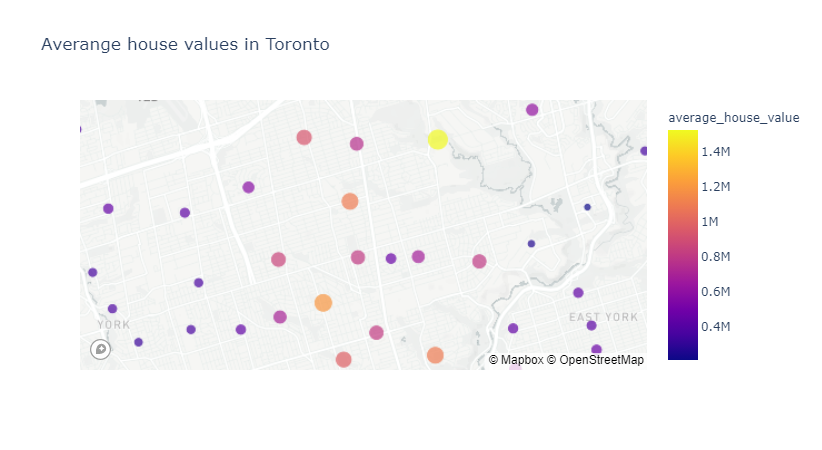

In [84]:
# Create a scatter mapbox to analyze neighbourhood info
px.set_mapbox_access_token(map_box_api)

map = px.scatter_mapbox(
    df_all_neighbourhoods,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    size_max=15,
    zoom=11,
    title="Averange house values in Toronto",
)
map.show()